In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


# Find out how many males and females participated in the test

In [4]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

# What do you think about the students' parental level of education?

In [5]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

C:\Users\XArchitecture\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

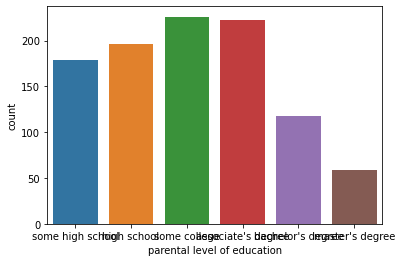

In [6]:

sns.countplot(data["parental level of education"])


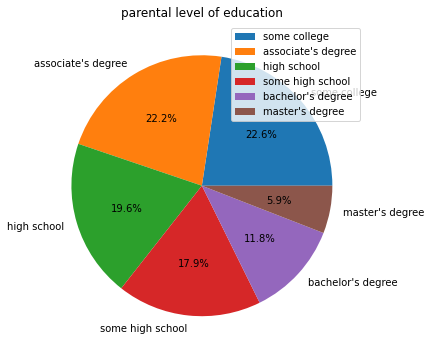

In [7]:
count_test=data['parental level of education'].value_counts()
labels=data['parental level of education'].value_counts().index
plt.figure(figsize=(6,6))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.title('parental level of education')
plt.show()

# Who scores the most on average for math, reading and writing based on gender

In [8]:
data.groupby('gender')['math score'].mean()



gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

In [9]:
data.groupby('gender')['reading score'].mean()

gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64

In [10]:
data.groupby('gender')['writing score'].mean()

gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64

In [11]:
data.groupby('gender')['math score','reading score','writing score'].agg(['mean'])

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_8332/2906863954.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('gender')['math score','reading score','writing score'].agg(['mean'])


,math score,reading score,writing score
,mean,mean,mean
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


# Who scores the most on average for math, reading and writing based on test preparation course

In [12]:
data.groupby('test preparation course')['math score'].mean()

test preparation course
completed    69.96648
none         63.78972
Name: math score, dtype: float64

In [13]:
data.groupby('test preparation course')['reading score'].mean()

test preparation course
completed    74.175978
none         66.417445
Name: reading score, dtype: float64

In [14]:
data.groupby('test preparation course')['writing score'].mean()

test preparation course
completed    74.684358
none         64.457944
Name: writing score, dtype: float64

In [15]:
data.groupby('test preparation course')['math score','reading score','writing score'].agg(['mean'])

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_8332/1939876325.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('test preparation course')['math score','reading score','writing score'].agg(['mean'])


,math score,reading score,writing score
,mean,mean,mean
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# What do you think about the scoring variation for math, reading and writing based on gender


In [16]:
df1=data.groupby('gender')['math score','reading score','writing score'].agg(['std'])
df1.head()

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_8332/2095052043.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=data.groupby('gender')['math score','reading score','writing score'].agg(['std'])


,math score,reading score,writing score
,std,std,std
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


<AxesSubplot:>

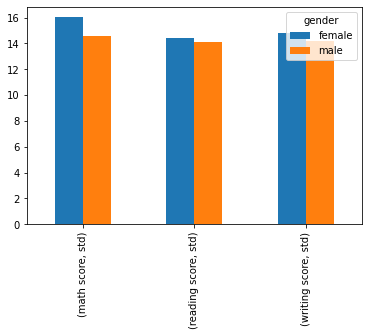

In [17]:

df1.T.plot(kind='bar')


# What do you think about the scoring variation for math, reading and writing based on test preparation course

In [18]:
df2=data.groupby('test preparation course')['math score','reading score','writing score'].agg(['std'])
df2

C:\Users\XARCHI~1\AppData\Local\Temp/ipykernel_8332/3420318019.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=data.groupby('test preparation course')['math score','reading score','writing score'].agg(['std'])


,math score,reading score,writing score
,std,std,std
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


<AxesSubplot:>

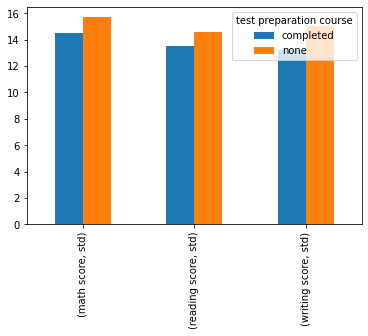

In [19]:
df2.T.plot(kind='bar')

# The management needs your help to give bonus points to the top 25% ofstudents based on their maths score, so how will you help the managementto achieve this.

In [20]:
data.shape

(1000, 8)

In [21]:
df3=data.sort_values(['math score'],ascending=False)
df3['math score'].head(250)

999    100
996    100
515    100
517    100
516    100
      ... 
856     77
855     77
854     77
853     77
852     77
Name: math score, Length: 250, dtype: int64

In [22]:
data['bonus point']=np.where(data['math score']>=77,1,0)

In [23]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus point
0,female,group C,some high school,free/reduced,none,0,17,10,0
1,female,group B,high school,free/reduced,none,8,24,23,0
2,female,group B,some high school,free/reduced,none,18,32,28,0
3,female,group B,some college,standard,none,11,38,32,0
4,female,group C,some college,free/reduced,none,22,39,33,0
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,1
996,male,group A,some college,standard,completed,100,96,86,1
997,male,group D,some college,standard,completed,100,97,99,1
998,male,group E,associate's degree,free/reduced,completed,100,100,93,1
